In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pathlib
import PIL
import cv2
import os

import tensorflow  as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential 
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator
from google.colab import files
from keras.preprocessing import image

**Load Data**

In [ ]:
data_dir = "/content/drive/My Drive/Data Science/Deep Learning/Dataset/Large Scale Fish/Fish_Dataset/Fish_Dataset"

In [ ]:
data_dir = pathlib.Path(data_dir)
data_dir

PosixPath('/content/drive/My Drive/Data Science/Deep Learning/Dataset/Large Scale Fish/Fish_Dataset/Fish_Dataset')

In [ ]:
filepath = list(data_dir.glob('**/*.png'))
labels = list(map(lambda x : os.path.split(os.path.split(x)[0])[1] ,filepath))

filepath = pd.Series(filepath,name='Filepath')
labels = pd.Series(labels, name='Label')

data= pd.merge(filepath,labels,left_index=True,right_index=True)
data = data[data['Label'].apply(lambda x : x[-2:] != 'GT')]

# resample
data = data.sample(frac=1).reset_index(drop=True)


In [ ]:
data['Label'].value_counts()

Trout                 1000
Red Sea Bream         1000
Sea Bass              1000
Striped Red Mullet    1000
Shrimp                1000
Red Mullet            1000
Black Sea Sprat       1000
Hourse Mackerel       1000
Gilt-Head Bream       1000
Name: Label, dtype: int64

**Show some images**

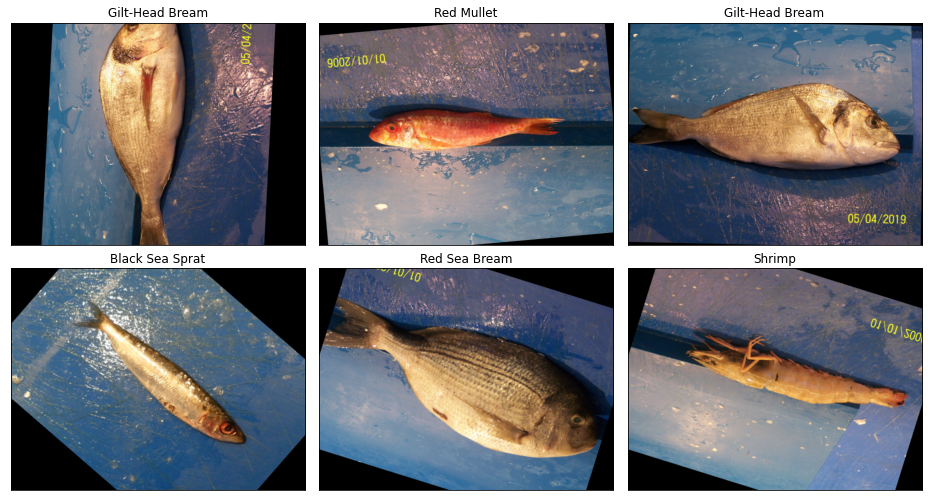

In [ ]:
fig,ax = plt.subplots(2,3,figsize=(13,7),subplot_kw={'xticks': [], 'yticks': []})

for i,ax in enumerate(ax.flat):
  ax.imshow(plt.imread(str(data['Filepath'][i])))
  ax.set_title(data['Label'][i])

plt.tight_layout()
plt.show()

**Add convert label**

In [ ]:
fish_labels = {
    'Black Sea Sprat' : 0,
    'Gilt-Head Bream' : 1,
    'Hourse Mackerel' : 2,
    'Red Mullet' : 3,
    'Red Sea Bream' : 4,
    'Sea Bass' : 5,
    'Shrimp' : 6,
    'Striped Red Mullet' : 7,
    'Trout' : 8,
}

In [ ]:
#data['Label_convert'] = data['Label'].apply(lambda x : fish_labels[x])

In [ ]:
data['Filepath'] = data['Filepath'].astype('str')

In [ ]:
data['Label'].value_counts()

Trout                 1000
Red Sea Bream         1000
Sea Bass              1000
Striped Red Mullet    1000
Shrimp                1000
Red Mullet            1000
Black Sea Sprat       1000
Hourse Mackerel       1000
Gilt-Head Bream       1000
Name: Label, dtype: int64

**Split Data**

In [ ]:
training_data = 0.75
testing_data = 0.15
validation_data = 0.10

X_train,X_test = train_test_split(data, test_size = 1- training_data ,random_state=1)
X_val,X_test = train_test_split(X_test, test_size = testing_data / (testing_data + validation_data), random_state=1)

print(f'The shape of training data : {X_train.shape}')
print(f'The shape of testing data : {X_test.shape}')
print(f'The shape of validation data : {X_val.shape}')


The shape of training data : (6750, 2)
The shape of testing data : (1350, 2)
The shape of validation data : (900, 2)


In [ ]:
datagen = ImageDataGenerator(rescale=(1./255))

img_size = (224,224)

X_train = datagen.flow_from_dataframe(dataframe= X_train, x_col = 'Filepath', y_col='Label', target_size= img_size, 
                                      color_mode='rgb', class_mode='categorical', batch_size=32, seed=42 )
X_test = datagen.flow_from_dataframe(dataframe= X_test, x_col = 'Filepath', y_col='Label', target_size= img_size, 
                                      color_mode='rgb', class_mode='categorical', batch_size=32, seed=42 )
X_val = datagen.flow_from_dataframe(dataframe= X_val, x_col = 'Filepath', y_col='Label', target_size= img_size, 
                                      color_mode='rgb', class_mode='categorical', batch_size=32, seed=42 )

Found 6750 validated image filenames belonging to 9 classes.
Found 1350 validated image filenames belonging to 9 classes.
Found 900 validated image filenames belonging to 9 classes.


In [ ]:



model = Sequential([
    layers.Conv2D(16,3,padding='same',activation='relu',input_shape=(224,224,3)),
    layers.MaxPooling2D(),
    layers.Conv2D(32,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(128,activation='relu'),
    layers.Dense(9,activation='softmax')

])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy']
              )

In [ ]:
Callback = tf.keras.callbacks.EarlyStopping(monitor='accuracy', patience=3)
mo_fit = model.fit(X_train,validation_data=X_val,epochs=10,callbacks=Callback)

Epoch 1/10
211/211 [==============================] - 3020s 14s/step - loss: 1.1328 - accuracy: 0.6081 - val_loss: 0.3755 - val_accuracy: 0.8711
Epoch 2/10
211/211 [==============================] - 293s 1s/step - loss: 0.1965 - accuracy: 0.9372 - val_loss: 0.1983 - val_accuracy: 0.9422
Epoch 3/10
211/211 [==============================] - 291s 1s/step - loss: 0.0520 - accuracy: 0.9855 - val_loss: 0.1087 - val_accuracy: 0.9656
Epoch 4/10
211/211 [==============================] - 290s 1s/step - loss: 0.0241 - accuracy: 0.9939 - val_loss: 0.0767 - val_accuracy: 0.9778
Epoch 5/10
211/211 [==============================] - 291s 1s/step - loss: 0.0117 - accuracy: 0.9970 - val_loss: 0.0301 - val_accuracy: 0.9911
Epoch 6/10
211/211 [==============================] - 292s 1s/step - loss: 0.0010 - accuracy: 1.0000 - val_loss: 0.0322 - val_accuracy: 0.9867
Epoch 7/10
211/211 [==============================] - 292s 1s/step - loss: 4.1749e-04 - accuracy: 1.0000 - val_loss: 0.0308 - val_accuracy: 

In [ ]:
model.save('/content/drive/My Drive/Data Science/Deep Learning/model_fish_new.h5')

In [ ]:
new_model = tf.keras.models.load_model('/content/drive/My Drive/Data Science/Deep Learning/model_fish_new.h5')

In [ ]:
!pip install tensorflowjs

     |████████████████████████████████| 71kB 5.4MB/s 


In [ ]:
!tensorflowjs_converter --input_format=keras '/content/drive/My Drive/model/model_fish.h5' "/content/drive/My Drive/model"

2021-06-18 01:53:29.765596: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
usage: TensorFlow.js model converters. [-h]
                                       [--input_format {tfjs_layers_model,keras_saved_model,tf_saved_model,tf_hub,tf_frozen_model,keras}]
                                       [--output_format {tfjs_graph_model,keras,keras_saved_model,tfjs_layers_model}]
                                       [--signature_name SIGNATURE_NAME]
                                       [--saved_model_tags SAVED_MODEL_TAGS]
                                       [--quantize_float16 [QUANTIZE_FLOAT16]]
                                       [--quantize_uint8 [QUANTIZE_UINT8]]
                                       [--quantize_uint16 [QUANTIZE_UINT16]]
                                       [--quantization_bytes {1,2}]
                                       [--split_weights_by_layer] [--version]
                           

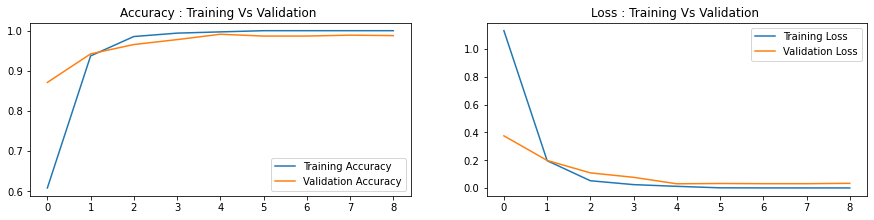

In [ ]:
accuracy = mo_fit.history['accuracy']
loss = mo_fit.history['loss']
validation_loss = mo_fit.history['val_loss']
validation_accuracy = mo_fit.history['val_accuracy']

plt.figure(figsize=(15, 7))
plt.subplot(2, 2, 1)
plt.plot(range(9), accuracy, label='Training Accuracy')
plt.plot(range(9), validation_accuracy, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Accuracy : Training Vs Validation ')

plt.subplot(2, 2, 2)
plt.plot(range(9), loss, label='Training Loss')
plt.plot(range(9), validation_loss, label='Validation Loss')
plt.title('Loss : Training Vs Validation ')
plt.legend(loc='upper right')
plt.show()

Saving 00030.png to 00030.png
00030.png
[8]
Trout


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


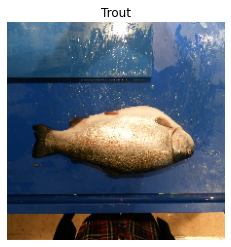

In [ ]:
uploaded = files.upload()
 
for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(224,224))
  imgplot = plt.imshow(img)
  plt.axis('off')
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
 
  images = np.vstack([x])
  classes = model.predict_classes(images, batch_size=32)
  
  print(fn)
  print(classes)

  if classes==0:
    print('Black Sea Sprat')
    plt.title('Black Sea Sprat')
  elif classes==1:
    print('Gilt-Head Bream')
    plt.title('Gilt-Head Bream')
  elif classes == 2:
    print('Hourse Mackerel')
    plt.title('Hourse Mackerel')
  elif classes == 3:
    print('Red Mullet')
    plt.title('Red Mullet')
  elif classes == 4:
    print('Red Sea Bream')
    plt.title('Red Sea Bream')
  elif classes == 5:
    print('Sea Bass')
    plt.title('Sea Bass')
  elif classes == 6:
    print('Shrimp')
    plt.title('Shrimp')
  elif classes == 7:
    print('Striped Red Mullet')
    plt.title('Striped Red Mullet')
  else :
    print('Trout')
    plt.title('Trout')
